<a href="https://colab.research.google.com/github/smiqueias/trablho-big-data/blob/master/faturamento_flamengo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

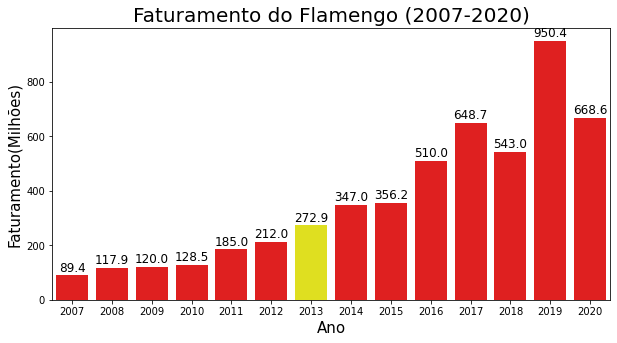

In [120]:
# Gráfico de faturamento do Flamengo
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# configura parametros de tamanho dos gráficos
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20




faturamento_times = pd.read_csv("https://raw.githubusercontent.com/smiqueias/trablho-big-data/master/Faturamento_Brasileirao.csv")

filtraPeloFlamengo = faturamento_times ['Clube'] == 'Flamengo'
faturamento_flamengo = faturamento_times[filtraPeloFlamengo]


colors = ['yellow' if year == 2014 else 'red' for year in faturamento_flamengo['Ano'].sort_values(ascending=False)]
plot_faturamento = seaborn.barplot(x="Ano", y="Faturamento(Milhões)", data=faturamento_flamengo, 
                       palette=colors)


plt.title('Faturamento do Flamengo (2007-2020)')

# Configura a exibição dos valores em cima da barra do gráfico
for p in plot_faturamento.patches:
    plot_faturamento.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 4),
                  textcoords='offset points')
    
plt.show()

In [122]:
# Vitórias do Flamengo em 2009
brasileirao_dados = pd.read_csv(
    "https://raw.githubusercontent.com/smiqueias/brasileira-dados/master/campeonato-brasileiro-full.csv")


brasileiro_2009 = (brasileirao_dados['data'] > '2009-01-01') & (brasileirao_dados['data'] < '2009-12-31')
vitorias_flamengo_2009 = brasileirao_dados[brasileiro_2009]['vencedor'] == 'Flamengo'
vitorias_flamengo_2009.sum()


19

In [43]:
# Vitórias do Flamengo em 2019
brasileiro_2019 = (brasileirao_dados['data'] > '2019-01-01') & (brasileirao_dados['data'] < '2019-12-31')
vitorias_flamengo_2019 = brasileirao_dados[brasileiro_2019]['vencedor'] == 'Flamengo'
vitorias_flamengo_2019.sum()

28

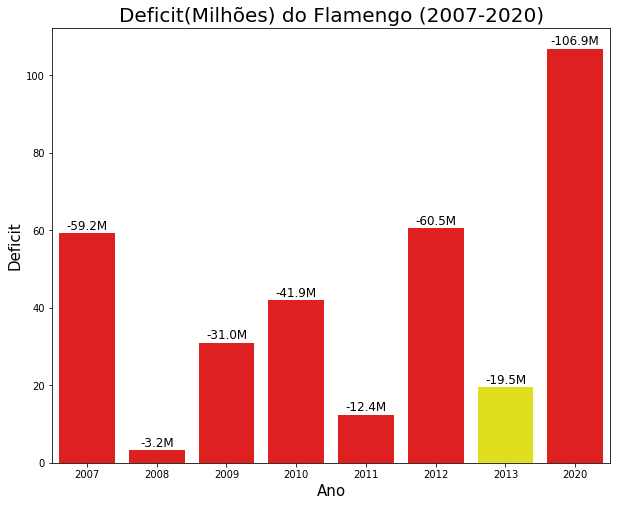

In [119]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# configura parametros de tamanho dos gráficos
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20




faturamento_times = pd.read_csv("https://raw.githubusercontent.com/smiqueias/trablho-big-data/master/Faturamento_Brasileirao.csv")

filtraPeloFlamengo = faturamento_times ['Clube'] == 'Flamengo'
faturamento_flamengo = faturamento_times[filtraPeloFlamengo]

list_deficit = []
list_superavit = []
list_anos_deficit = []
list_anos_superavit = []

# Seprara os valores de Superavit e Deficit
for i,j,k in zip(faturamento_flamengo['Deficit ou Superavit'], faturamento_flamengo['Superavit/Deficit(Milhões)'], faturamento_flamengo['Ano']):
  if i.__contains__('-'):
    list_deficit.append(j)
    list_anos_deficit.append(k)
  else:
    list_superavit.append(j)
    list_anos_superavit.append(k)  

# Cria o dataframe baseado dos valores de deficit
data_frame_deficit = pd.DataFrame(zip(list_deficit,list_anos_deficit), columns=['Deficit','Ano'])



colors = ['yellow' if year == 2014 else 'red' for year in faturamento_flamengo['Ano'].sort_values(ascending=False)]
plot_faturamento = seaborn.barplot(x="Ano", y="Deficit", data=data_frame_deficit, 
                       palette=colors)


for p in plot_faturamento.patches:
    plot_faturamento.annotate(f"-{p.get_height()}M",
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 4),
                  textcoords='offset points')

plt.title('Deficit(Milhões) do Flamengo (2007-2020)')



plt.show()

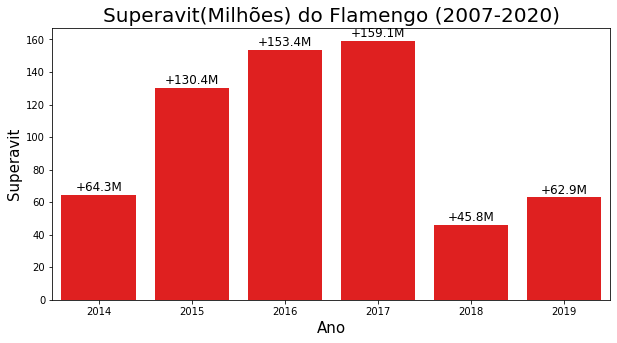

In [123]:

data_frame_superavit = pd.DataFrame(zip(list_superavit,list_anos_superavit), columns=['Superavit','Ano'])

colors = ['yellow' if year == 2014 else 'red' for year in faturamento_flamengo['Ano'].sort_values(ascending=False)]
plot_faturamento = seaborn.barplot(x="Ano", y="Superavit", data=data_frame_superavit, 
                       palette=colors)


for p in plot_faturamento.patches:
    plot_faturamento.annotate(f"+{p.get_height()}M",
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 4),
                  textcoords='offset points')

plt.title('Superavit(Milhões) do Flamengo (2007-2020)')



plt.show()